# Diabetes Classification

### What is Diabetes?

Diabetes is a disease that occurs when our blood glucose goes too high. Blood glucose is our main source of energy and comes from the food you eat. Insulin is a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells causes diabetes.

# Objective

#### The objective of the project is to diagnostically predict whether patient has diabetes or not, based on certain diagnostic measurements included in the dataset.

This program builds a classifier for Pima Indians Diabetes dataset - https://www.kaggle.com/uciml/pima-indians-diabetes-database. It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

1) Pregnancies: Number of times pregnant 

2) Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3) BloodPressure: Diastolic blood pressure (mm Hg)

4) SkinThickness: Triceps skin fold thickness (mm)

5) Insulin: 2-Hour serum insulin (mu U/ml)

6) BMI: Body mass index (weight in kg/(height in m)^2)

7) DiabetesPedigreeFunction: Diabetes pedigree function

8) Age: Age (years)

9) Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


# Phases of the project

1. Data Exploration
2. Data Cleaning
3. Model Selection
4. Model Parameter Tuning 
5. Evaluation
6. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('diabetes1.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration

In [2]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 9)


In [3]:
data.groupby('Outcome').size() #1 for diabetic person

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000003793F6108>,
      dtype=object)

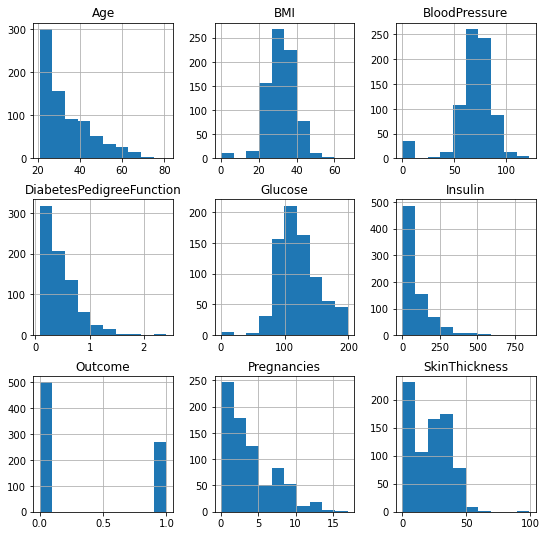

In [4]:
data.hist(figsize=(9, 9))


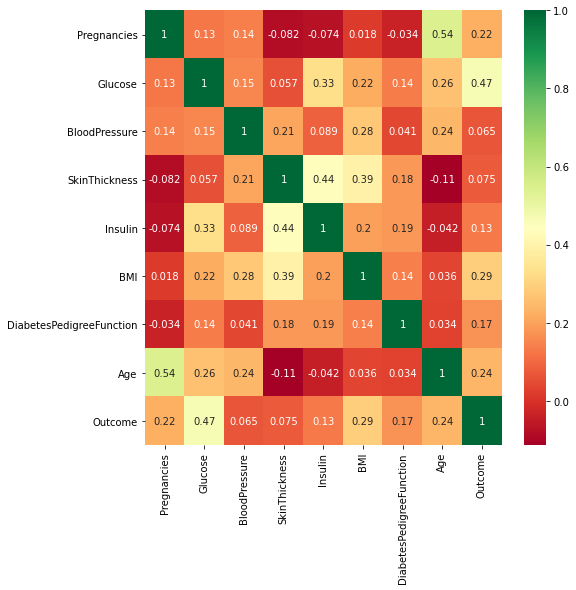

In [54]:
#get correlations of each features in dataset
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize=(8,8))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

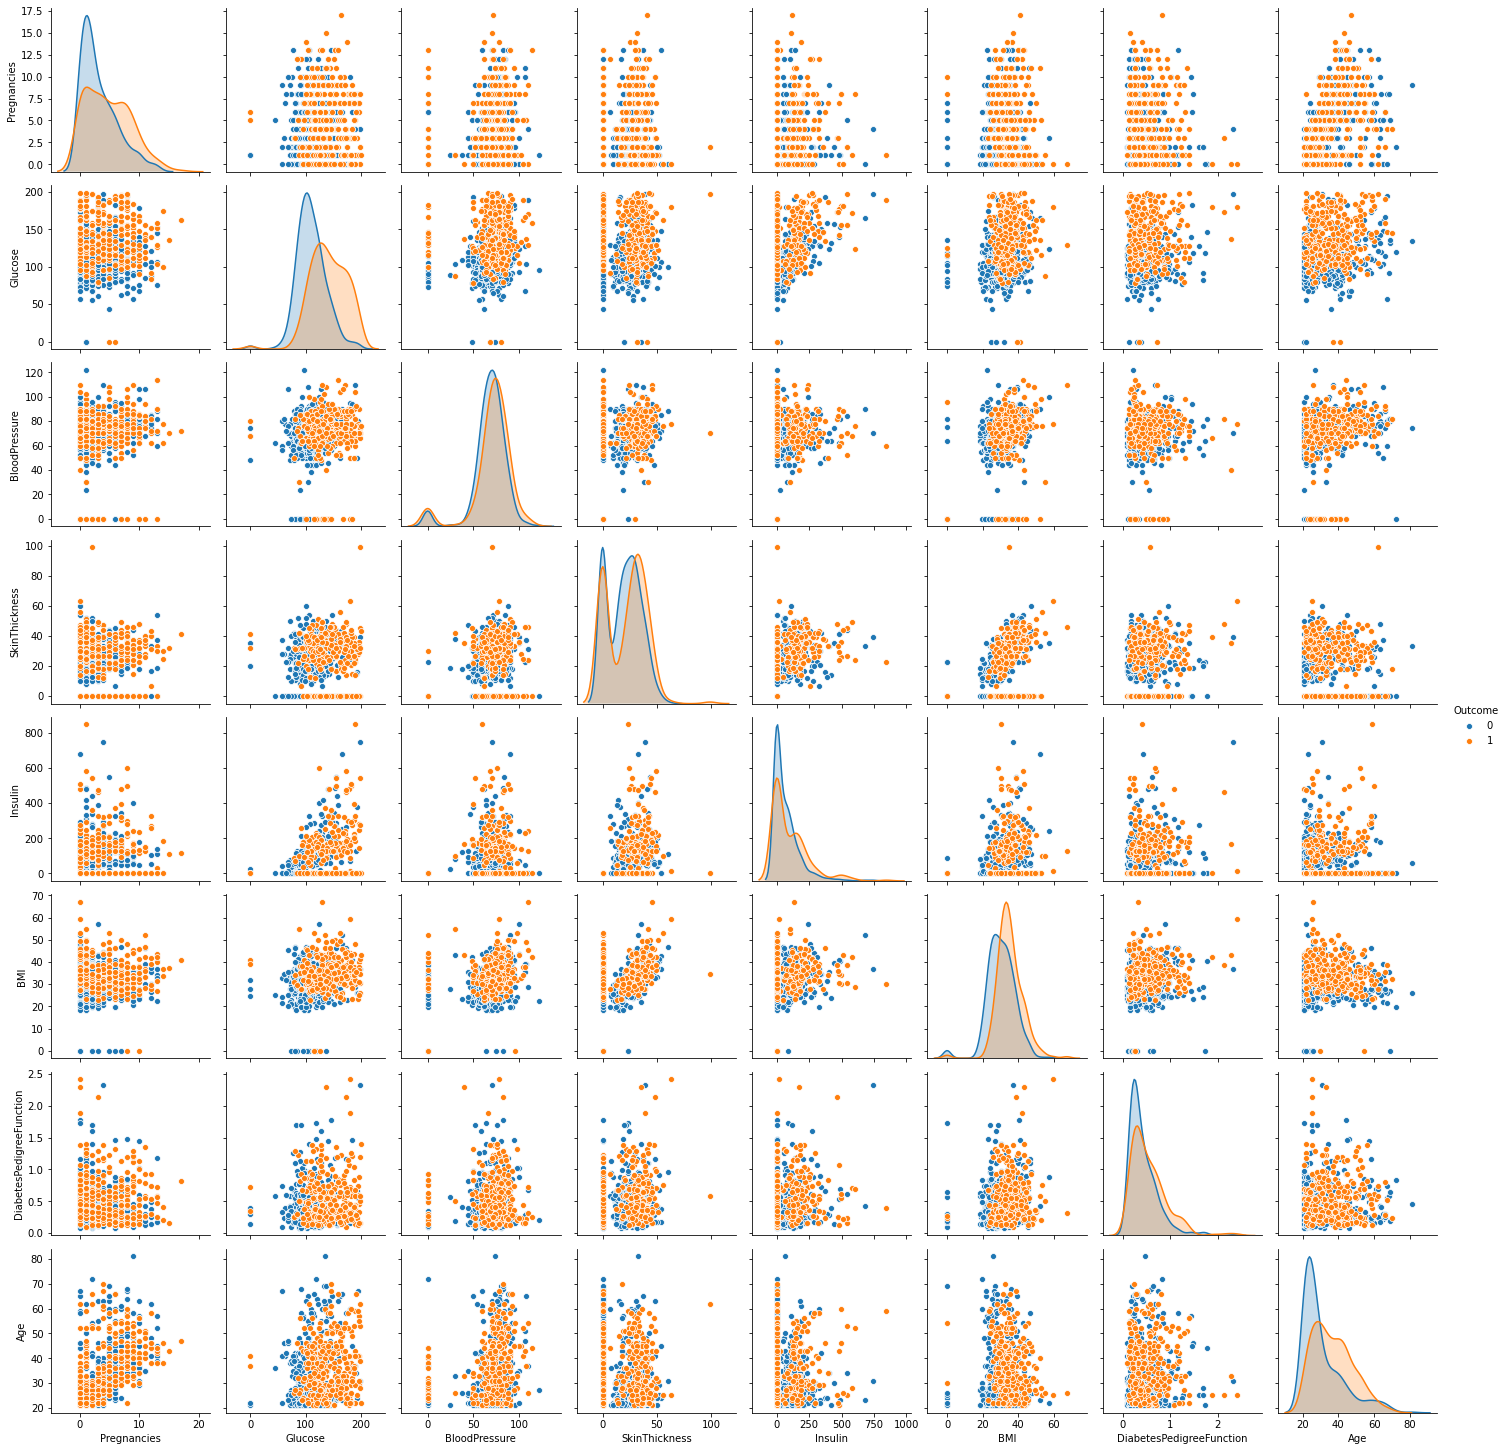

In [6]:
sns.pairplot(data,hue='Outcome') #Blue dots-> Outcome=0 Orange dots-> Outcome=1

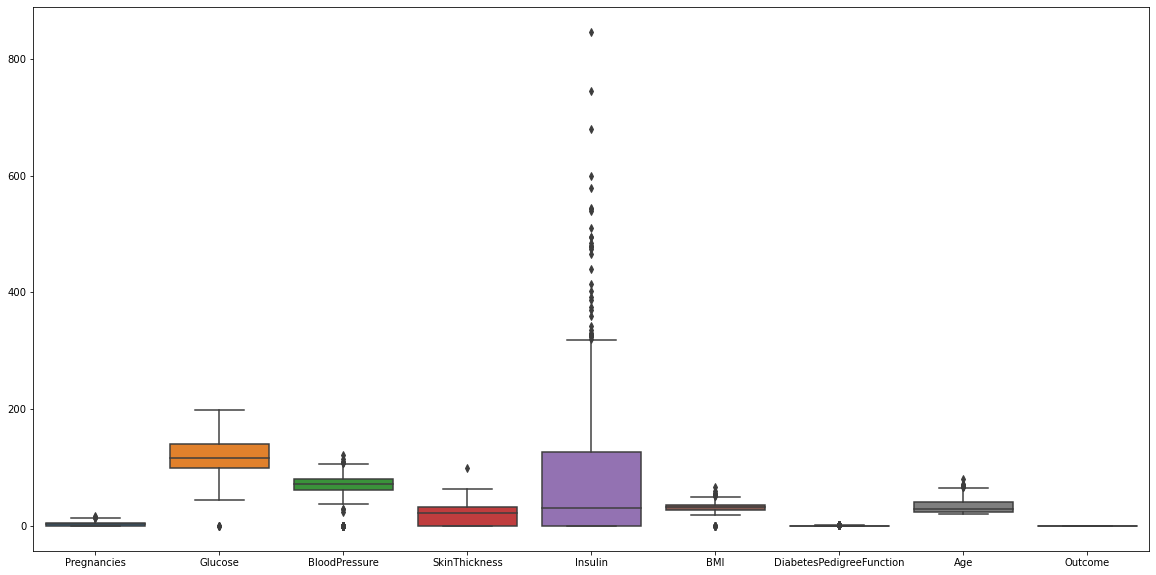

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

# Data Cleaning

In [8]:
data.isnull().sum()
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
print("Total: " , data[data["BloodPressure"]==0].shape[0])
print(data[data["BloodPressure"]==0].groupby('Outcome')['BMI'].count())

Total:  35
Outcome
0    19
1    16
Name: BMI, dtype: int64


In [10]:
print("Total: ", data[data["Glucose"]==0].shape[0])
print(data[data["Glucose"]==0].groupby('Outcome')['Age'].count())

Total:  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [11]:
print("Total: ", data[data["SkinThickness"]==0].shape[0])
print(data[data["SkinThickness"]==0].groupby('Outcome')['Age'].count())

Total:  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [12]:
print("Total: ", data[data["BMI"]==0].shape[0])
print(data[data["BMI"]==0].groupby('Outcome')['Age'].count())

Total:  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [13]:
print("Total: ", data[data["Insulin"]==0].shape[0])
print(data[data["Insulin"]==0].groupby('Outcome')['Age'].count())

Total:  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [14]:
#remove outlier
index=data.index[data['SkinThickness']==data['SkinThickness'].max()]
data_mod = data.drop(index)

data_mod=data[(data["BMI"]!=0)&(data["BloodPressure"]!=0)&(data["Glucose"]!=0)]

data_mod.loc[data_mod.Insulin==0, 'Insulin']=data['Insulin'].median()

data_mod.loc[data.SkinThickness==0,'SkinThickness']=data['SkinThickness'].median()
data_mod

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,30.5,33.6,0.627,50,1
1,1,85,66,29.0,30.5,26.6,0.351,31,0
2,8,183,64,23.0,30.5,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,30.5,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,23.0,30.5,30.1,0.349,47,1


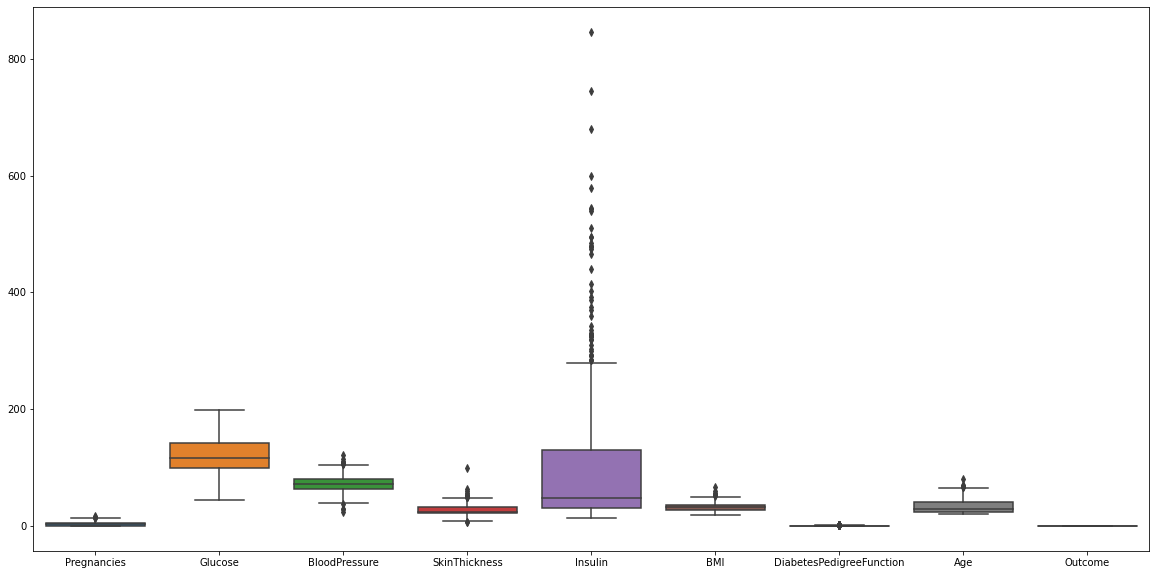

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_mod)

In [16]:
#data_mod is the cleaned data
X = data_mod.iloc[:,0:8]  #independent columns
Y = data_mod.iloc[:,-1]   #target column i.e  Outcome

np.mean(Y), np.mean(1-Y)

(0.34392265193370164, 0.6560773480662984)

# Model Selection

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,stratify = data_mod.Outcome, random_state=0)
#normalizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors

In [20]:
names=[]
accuracy=[]
classifier=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))



Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.77


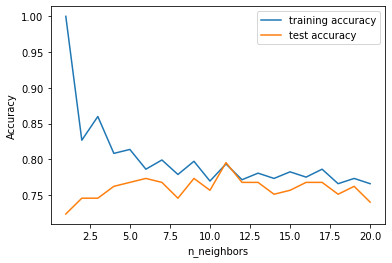

In [21]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, Y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [22]:
from sklearn.model_selection import StratifiedKFold
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
if 'KNN' not in names:
    names.append('KNN')
    classifier.append(knn)
    accuracy.append(knn.score(X_test, Y_test))
    

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.80


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=500)
lg.fit(X_train, Y_train)
print("Training set accuracy: {:.3f}".format(lg.score(X_train, Y_train)))
print("Test set accuracy: {:.3f}".format(lg.score(X_test, Y_test)))

if 'LogisticRegression' not in names:
    names.append('LogisticRegression')
    classifier.append(lg)
    accuracy.append(lg.score(X_test, Y_test))
    

Training set accuracy: 0.772
Test set accuracy: 0.773


# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.707


In [25]:
dt = DecisionTreeClassifier(max_depth =3)
dt.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))
if 'DecisionTree' not in names:
    names.append('DecisionTree')
    classifier.append(dt)
    accuracy.append(dt.score(X_test, Y_test))
    


Accuracy on training set: 0.777
Accuracy on test set: 0.729


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rn = RandomForestClassifier(n_estimators=100, random_state=0)
rn.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rn.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.757


In [27]:
rn = RandomForestClassifier(max_depth=3)
rn.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rn.score(X_test, Y_test)))
if 'RandomForest' not in names:
    names.append('RandomForest')
    classifier.append(rn)
    accuracy.append(rn.score(X_test, Y_test))
    

Accuracy on training set: 0.796
Accuracy on test set: 0.762


# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, Y_test)))

Accuracy on training set: 0.921
Accuracy on test set: 0.762


In [29]:
gb = GradientBoostingClassifier(max_depth=3)
gb.fit(X_train, Y_train)

print("Accuracy on training set: {:.2f}".format(gb.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(gb.score(X_test, Y_test)))
if 'GradientBoosting' not in names:
    names.append('GradientBoosting')
    classifier.append(gb)
    accuracy.append(gb.score(X_test, Y_test))
    


Accuracy on training set: 0.92
Accuracy on test set: 0.76


# Search Vector Classifier

In [30]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, Y_train)
Y_pred= svc.predict(X_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, Y_test)))
if 'svc' not in names:
    names.append('svc')
    classifier.append(svc)
    accuracy.append(svc.score(X_test, Y_test))
    

Accuracy on training set: 0.82
Accuracy on test set: 0.77


# Neural Networks

In [31]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42,max_iter=1000,alpha=2)
mlp.fit(X_train, Y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, Y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, Y_test)))
if 'ANN' not in names:
    names.append('ANN')
    classifier.append(mlp)
    accuracy.append(mlp.score(X_test, Y_test))
    

Accuracy on training set: 0.79
Accuracy on test set: 0.80


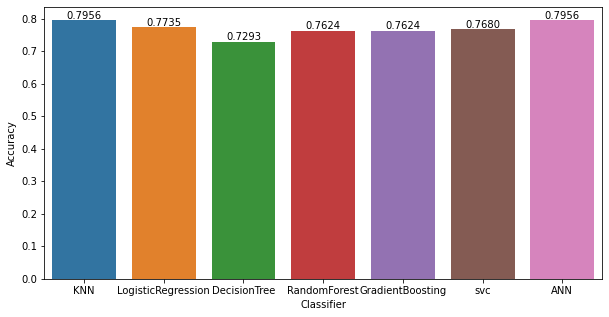

In [32]:
compare=pd.DataFrame({'Names':names,'Accuracy':accuracy})
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
axis = sns.barplot(x = 'Names', y = 'Accuracy', data =compare)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.show()

# Evaluation

## Confusion Matrix

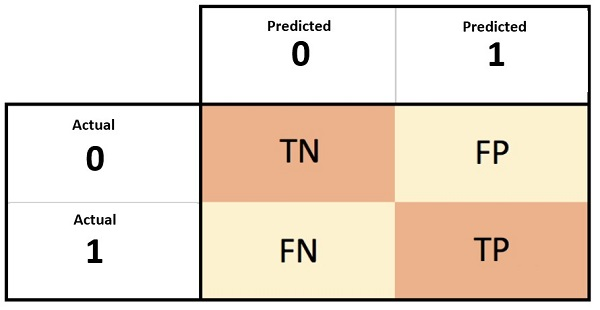

1) True Negatives(TN): Originally not diabetic, predicted as not diabetic.

2) True Positives(TP): Originally diabetic, predicted as diabetic.

3) False Negative(FN): Originally a diabetic, predicted as not diabetic.

4) False Positive(FP): Originally not diabetic, predicted as a diabetic.

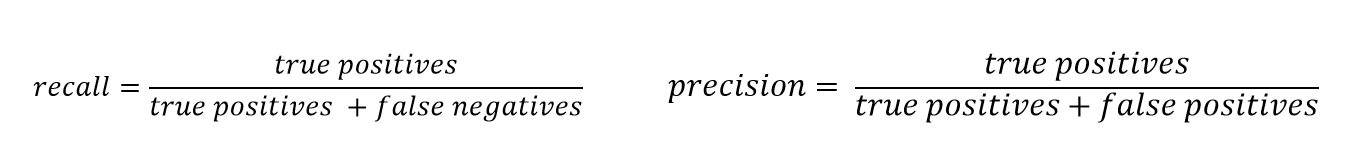

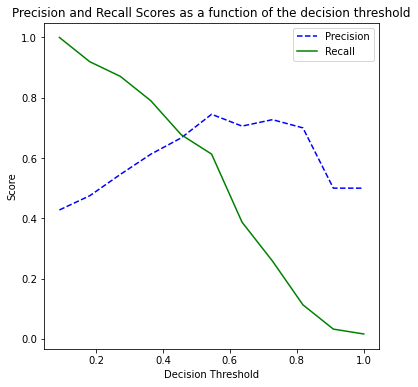

In [33]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(clf):
    
    lr_probs =clf.predict_proba(X_test)    
    lr_probs = lr_probs[:, 1]
    precisions,recalls,thresholds = precision_recall_curve(Y_test,lr_probs)
    
    plt.figure(figsize=(6,6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
plot_precision_recall_vs_threshold(knn)

# Tuning a classifier for recall can be achieved in two steps:

1) Using GridSearchCV to tune your model by searching for the best hyperparameters and keeping the classifier with the highest recall score.

2) Adjust the decision threshold using the precision-recall curve and the roc curve, which is a more involved method that I will walk through.

## 1) Optimize for recall using GridSearchCV with the scoring argument.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] }
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
skf = StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(knn, parameters, cv=skf, scoring=scorers, return_train_score=True, refit='recall_score')
grid_search.fit(X_train,Y_train)
y_pred = grid_search.predict(X_test)
print(grid_search.best_params_)

{'n_neighbors': 15}


## 2) Adjust the decision threshold to identify the operating point

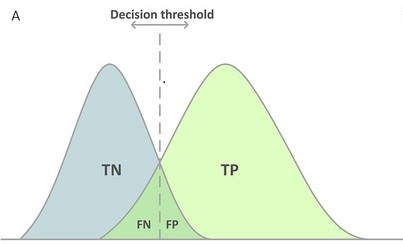

In [45]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_recall_curve
def adjusted_classes(y_pred_prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_pred_prob] 

def evaluate(clf,t,compare_p_r):
    clf_probs =clf.predict_proba(X_test)    
    clf_probs =clf_probs[:, 1]
    pred_adjusted = adjusted_classes(clf_probs, t) 
    print(t)
    cm = confusion_matrix(Y_test, pred_adjusted)
 
    print('TN - True Negative {}'.format(cm[0,0]))
    print('FP - False Positive {}'.format(cm[0,1]))
    print('FN - False Negative {}'.format(cm[1,0]))
    print('TP - True Positive {}'.format(cm[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

    precision=np.divide(np.sum([cm[1,1]]),np.sum([cm[1,1],cm[0,1]]))
    recall=np.divide(np.sum([cm[1,1]]),np.sum([cm[1,1],cm[1,0]]))
    f1= (2*recall*precision)/(recall+precision)
    print('Precision: {}' .format(precision))
    print('Recall: {}' .format(recall))
    print('f1 score: {}' .format(f1))
    if clf not in compare_p_r:
        compare_p_r.append({'Classifier': clf,'Threshold':t, 'Precision': precision, 'Recall':recall, 'f1 Score': f1} )

In [49]:
compare_p_r=[] 

In [52]:
t=0.3
evaluate(grid_search,t,compare_p_r)

0.3
TN - True Negative 87
FP - False Positive 32
FN - False Negative 14
TP - True Positive 48
Accuracy Rate: 0.7458563535911602
Misclassification Rate: 0.2541436464088398
Precision: 0.6
Recall: 0.7741935483870968
f1 score: 0.676056338028169


In [53]:
df=pd.DataFrame(compare_p_r)
df

,Classifier,Threshold,Precision,Recall,f1 Score
0,"GridSearchCV(cv=StratifiedKFold(n_splits=10, r...",0.5,0.680000,0.548387,0.607143
1,"GridSearchCV(cv=StratifiedKFold(n_splits=10, r...",0.4,0.671429,0.758065,0.712121
2,"GridSearchCV(cv=StratifiedKFold(n_splits=10, r...",0.3,0.600000,0.774194,0.676056


# Conclusion

We are getting best results by using K-Nearest Neighbor classifier at threshold 0.4